<a href="https://colab.research.google.com/github/epomar/Coursera_Capstone/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

The data-set to be used can be downloaded from [here](https://drive.google.com/file/d/1aWJgm73Qbsz8aMi-GRuCQgxTjiMnin2t/view?usp=sharing). 



> Download the data

## 1. Importing the required libraries 

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## 2. Upload the data

 To get or load the dataset into the notebook: 

At the left-hand side of the notebook, you will find a folder. When you click that you will find a tab with three options, you just have to select Files. 

One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled.

## 3. Loading the data into the data frame.

In [135]:
df = pd.read_csv("Credit.csv")
# To display the top 10 rows 
df.head(10)   


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


## 4. Checking the types of data


In [136]:
df.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


## 6.  EDA


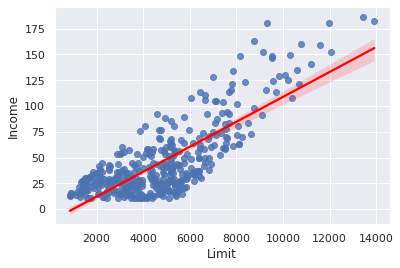

In [138]:
sns.regplot(x="Limit", y="Income", data=df, line_kws={'color':'red'})
plt.show()


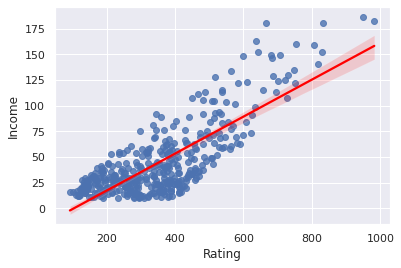

In [139]:
sns.regplot(x="Rating", y="Income", data=df, line_kws={'color':'red'})
plt.show()


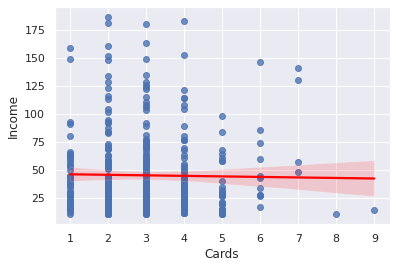

In [140]:
sns.regplot(x="Cards", y="Income", data=df, line_kws={'color':'red'})
plt.show()


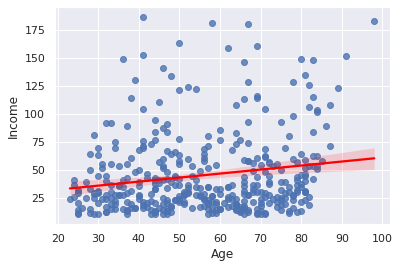

In [141]:
sns.regplot(x="Age", y="Income", data=df, line_kws={'color':'red'})
plt.show()


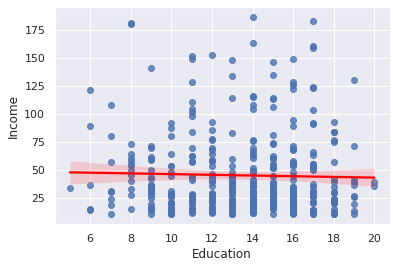

In [142]:
sns.regplot(x="Education", y="Income", data=df, line_kws={'color':'red'})
plt.show()


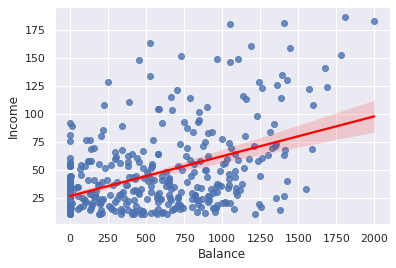

In [ ]:
sns.regplot(x="Balance", y="Income", data=df, line_kws={'color':'red'})
plt.show()


In [ ]:
import statsmodels.formula.api as smf
lin_model = smf.ols("Income ~ Limit + Rating  + Balance", data=df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     596.2
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.01e-146
Time:                        10:46:24   Log-Likelihood:                -1650.4
No. Observations:                 400   AIC:                             3309.
Df Residuals:                     396   BIC:                             3325.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.6169      3.181    -12.455      0.000     -45.870     -33.364
Limit          0.0094      0.004      2.276      0.023       0.001       0.018
Rating         0.2106      0.062      3.389      0.001       0.088       0.333
Balance       -0.0664      0.003    -20.418      0.000      -0.073      -0.060
==============================================================================
Omnibus:                       33.380   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.334
Skew:                           0.777   Prob(JB):                     1.74e-09
Kurtosis:                       2.941   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If the t values are not 0 or really close to 0, then it means that we need to accept the hypothesis that the variable is not relevant to explain the model.

In [143]:
required_df = df[['Limit', 'Rating','Balance']]
required_df.describe()

,Limit,Rating,Balance
count,400.000000,400.000000,400.000000
mean,4735.600000,354.940000,520.015000
std,2308.198848,154.724143,459.758877
min,855.000000,93.000000,0.000000
25%,3088.000000,247.250000,68.750000
50%,4622.500000,344.000000,459.500000
75%,5872.750000,437.250000,863.000000
max,13913.000000,982.000000,1999.000000


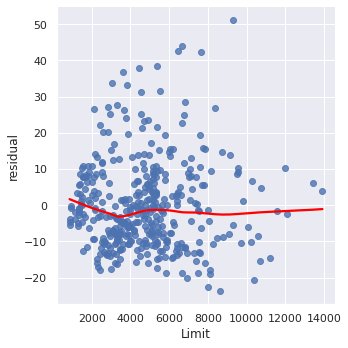

In [144]:
temp_data = pd.DataFrame(dict(Limit=required_df.Limit, residual=lin_model.resid))
graph = sns.lmplot(x='Limit', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})

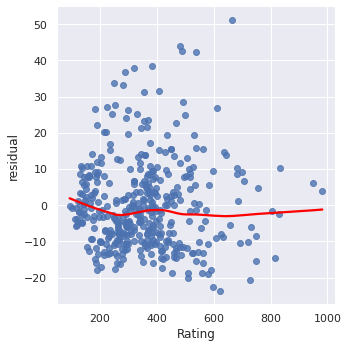

In [145]:
temp_data = pd.DataFrame(dict(Rating=required_df.Rating, residual=lin_model.resid))
graph = sns.lmplot(x='Rating', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})

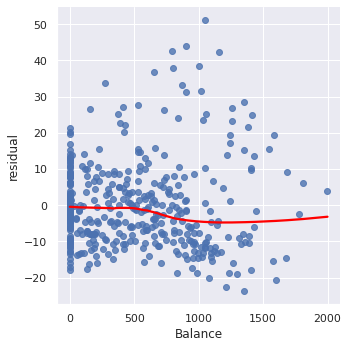

In [146]:
temp_data = pd.DataFrame(dict(Balance=required_df.Balance, residual=lin_model.resid))
graph = sns.lmplot(x='Balance', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})

In [147]:
import statsmodels.formula.api as smf
lin_model = smf.ols("Income ~ Rating + np.square(Rating) + np.power(Rating,3)+  np.square(Balance) + Balance", data=df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     581.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.34e-179
Time:                        11:03:39   Log-Likelihood:                -1566.8
No. Observations:                 400   AIC:                             3146.
Df Residuals:                     394   BIC:                             3170.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.0683      6.055      2.984      0.003       6.164      29.972
Rating                 -0.1076      0.047     -2.291      0.022      -0.200      -0.015
np.square(Rating)       0.0010      0.000      9.281      0.000       0.001       0.001
np.power(Rating, 3) -5.778e-07   7.15e-08     -8.086      0.000   -7.18e-07   -4.37e-07
np.square(Balance)   1.322e-05   4.37e-06      3.023      0.003    4.62e-06    2.18e-05
Balance                -0.0807      0.007    -12.033      0.000      -0.094      -0.067
==============================================================================
Omnibus:                       73.390   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.628
Skew:                           1.087   Prob(JB):                     3.88e-27
Kurtosis:                       4.603   Cond. No.                     1.29e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


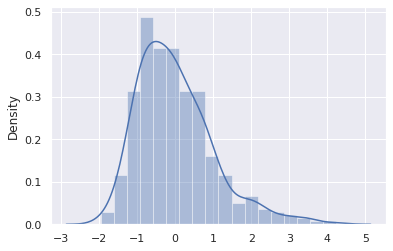

In [148]:
sns.distplot(lin_model.get_influence().resid_studentized_internal)
plt.show()

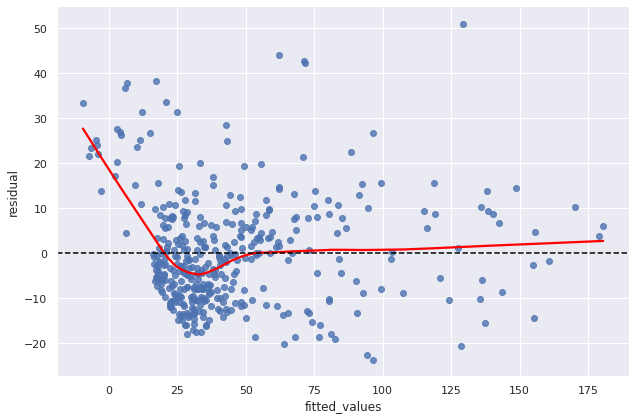

In [149]:
temp_data = pd.DataFrame(dict(fitted_values=lin_model.fittedvalues, residual=lin_model.resid))
graph = sns.lmplot(x='fitted_values', y='residual', data=temp_data, lowess=True, height=6, aspect=1.5,
                line_kws={'color':'red'})
graph.axes[0][0].axhline(0, color='black', ls='--')
plt.show()